# I installed the basic programs I need for my work

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# imported the Data

In [14]:
CountrySeries = pd.read_csv('EdStatsCountry-Series.csv')
Country = pd.read_csv("EdStatsCountry.csv")   
Data = pd.read_csv("EdStatsData.csv")
FootNote = pd.read_csv("EdStatsFootNote.csv")
Series = pd.read_csv("EdStatsSeries.csv")

# work on Countryseries 
## I put head to get an idea of the content

In [15]:
Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### Seing the shape of the data, it shows there's 241 countries instead of 195

In [16]:
Country.shape

(241, 32)

### need to see how many unique data are in each columns

In [17]:
print ("Country Code:",Country["Country Code"].nunique())
print ("Special Notes:",Country["Special Notes"].nunique())
print ("Income Group:",Country["Income Group"].nunique())

Country Code: 241
Special Notes: 131
Income Group: 5


###  seeing on dataframe index something called icome group I felt this data could be usefull for my analysis on countries that could have enough income to purchase the services that openclassroom requires. 

#### saw the unique variables and discovered that the there's 5 usefull variable and one to remove

In [18]:
Country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

### I did a presumption that will be confirmed at the end where Low income and low middle income will not be relevant for us. I have removed them and did try to have an idea what reagion those countries are located and if we desire to make a longer project

In [19]:
Country_new = Country[Country['Income Group'].isin(['High income: nonOECD', 'High income: OECD',"Upper middle income"])]

In [20]:
Country_new = Country_new[["Country Code","Short Name", "Region", "Income Group"]]
Country_new

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
6,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD
...,...,...,...,...
227,USA,United States,North America,High income: OECD
229,VCT,St. Vincent and the Grenadines,Latin America & Caribbean,Upper middle income
230,VEN,Venezuela,Latin America & Caribbean,Upper middle income
231,VIR,Virgin Islands,Latin America & Caribbean,High income: nonOECD


In [21]:
Country_new.isna().sum().sort_values(ascending=False)

Country Code    0
Short Name      0
Region          0
Income Group    0
dtype: int64

In [22]:
Country_Graph = Country_new.groupby("Income Group").count()
Country_Graph

,Country Code,Short Name,Region
Income Group,,,
High income: OECD,31,31,31
High income: nonOECD,44,44,44
Upper middle income,55,55,55


In [23]:
Country_Graph.sort_values(by='Country Code',ascending=False,inplace=True)

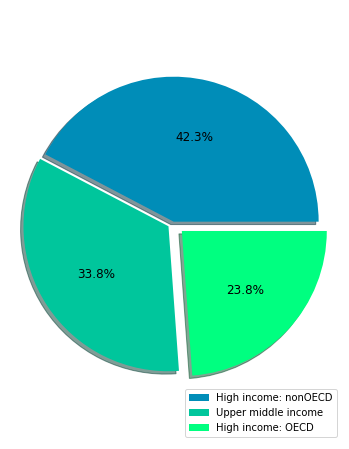

In [24]:
plt.figure(figsize=(6,8))

group_names = Country_new["Income Group"].unique()

counts = Country_Graph['Country Code']

explode = (0.01, 0.04, 0.08)
colors = ['#008DB8', '#00C69C', '#00FF80']

counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, shadow = True, autopct='%1.1f%%', labels=None )
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=group_names, loc='lower right')
plt.show()
plt.savefig('income division2.png')

In [25]:
Country_Graph_Reg = Country_new.groupby("Region").count()
Country_Graph_Reg.sort_values(by='Country Code',ascending=False,inplace=True)

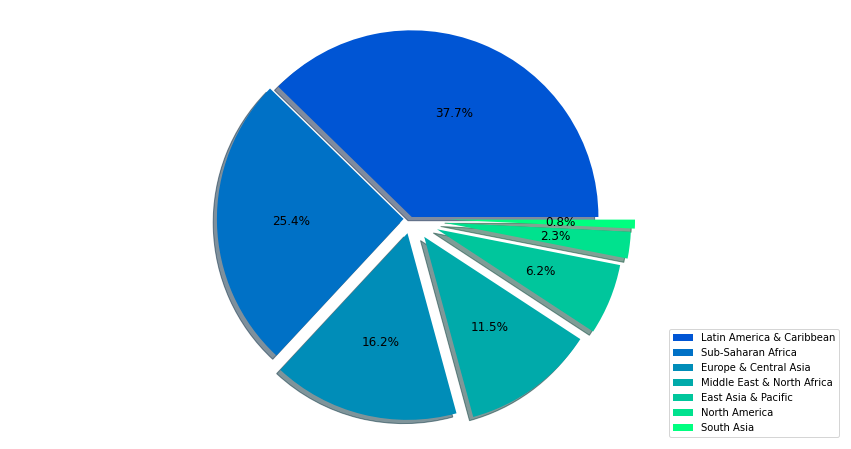

In [26]:
plt.figure(figsize=(15,8))

group_names = Country_new["Region"].unique()

counts = Country_Graph_Reg['Country Code']

explode = (0.01, 0.04, 0.08, 0.12, 0.15, 0.18, 0.2)
colors = ['#0055D4', '#0071C6', '#008DB8', '#00AAAA','#00C69C', '#00E28E', '#00FF80', ]

counts.plot(kind='pie', fontsize=12, colors=colors, explode=explode, shadow = True, autopct='%1.1f%%', labels=None )
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=group_names, loc='lower right')
plt.show()
plt.savefig('Income regions division.png')

# Working on data 

In [27]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### create the list of years from 1970 to 2017 and to a list of string

In [28]:
years = list(range(1970, 2018))
years = list(map(str, years))

### will take all the columns that has those year list. I saw that the list may have to many empty variable. so I decided to make a graph and see what years that has enough contents to be useful. discovering that from 2000 till 2015 there's content but I felt I would be able to save 2016

In [29]:
Data_graph = Data[years]
Data_graph

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,...,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN
886926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN
886927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN
886928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,NaN


In [30]:
Data_graph_count = Data_graph.count()
Data_graph_count.head()

1970    72288
1971    35537
1972    35619
1973    35545
1974    35730
dtype: int64

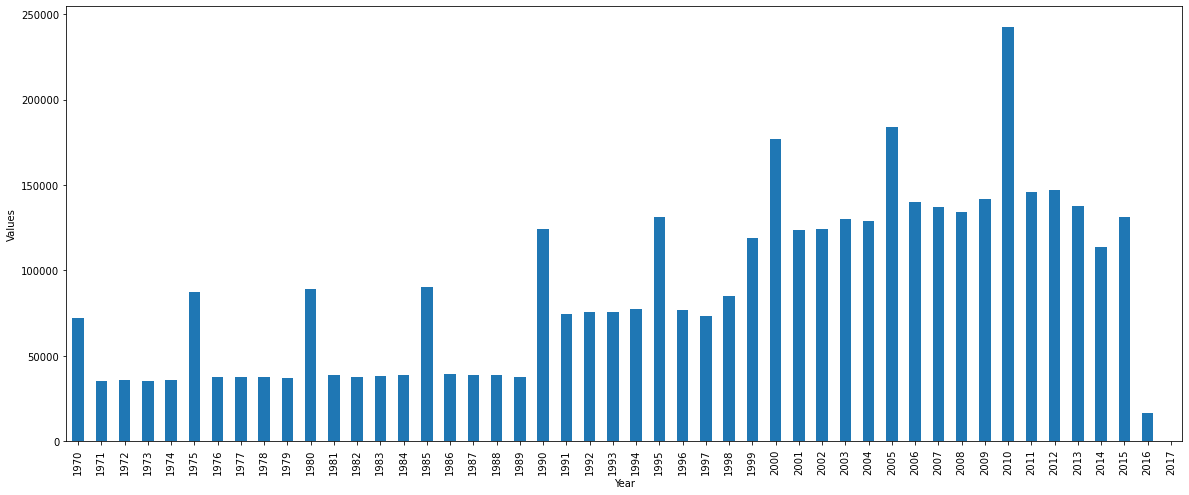

In [31]:
Data_graph_count.plot(kind='bar', figsize=(20, 8))
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()
plt.savefig('Data.png')

In [32]:
years = list(range(2000, 2017))
years = list(map(str, years))

### this will add the list years into the colmnus list  and added the years list I have created just to save time

In [33]:
cols = ["Country Code","Country Name","Indicator Name","Indicator Code"]
cols.extend(years)
cols

['Country Code',
 'Country Name',
 'Indicator Name',
 'Indicator Code',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [34]:
Data_new = Data[cols]
Data_new

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ARB,Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARB,Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARB,Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARB,Arab World,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,...,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,ZWE,Zimbabwe,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN
886926,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN
886927,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN
886928,ZWE,Zimbabwe,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN


### feeling by removing all NA could be counter productive. deciding to keep Row that are 75% full to fill them up with the Average

In [35]:
perc = 25.0 # Here N is 25
min_count =  int(((100-perc)/100)*Data_new.shape[1] + 1)
Data_final = Data_new.dropna( axis=0, thresh=min_count)

In [36]:
Data_final

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,ARB,Arab World,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,...,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN
5,ARB,Arab World,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,...,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN
6,ARB,Arab World,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,...,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN
7,ARB,Arab World,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,...,85.866692,86.444138,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN,NaN
12,ARB,Arab World,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,...,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886252,ZWE,Zimbabwe,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0
886363,ZWE,Zimbabwe,Total outbound internationally mobile tertiary...,UIS.OE.56.40510,10514.000000,12232.000000,15525.000000,17576.000000,15464.000000,15994.000000,...,21347.000000,24581.000000,20792.000000,25236.000000,28700.000000,16012.000000,15885.000000,NaN,NaN,NaN
886611,ZWE,Zimbabwe,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,3.700000,4.500000,4.300000,4.000000,4.100000,4.300000,...,4.800000,5.300000,6.000000,4.600000,6.000000,5.900000,5.800000,5.800000,5.1,4.9
886612,ZWE,Zimbabwe,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,5.700000,7.500000,6.100000,4.900000,4.300000,5.300000,...,6.100000,5.500000,4.900000,7.700000,4.800000,4.700000,4.600000,4.500000,5.1,5.6


### the mean takes always the colmuns forms that is why we transposed and transposed it again to have it 

In [37]:
Data_final = Data_final.T.fillna(Data_final.mean(axis=1)).T

In [38]:
Data_final

,Country Code,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,ARB,Arab World,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,...,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,82.837608,82.837608
5,ARB,Arab World,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,73.27562,75.13298,76.641022,77.65358,78.485397,79.475769,...,80.58242,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,80.126261,80.126261
6,ARB,Arab World,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.90406,0.91275,0.91979,0.9263,0.92768,0.93084,...,0.93846,0.9425,0.94347,0.94762,0.9467,0.96208,0.96409,0.9662,0.937477,0.937477
7,ARB,Arab World,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,81.051369,82.315048,83.324059,83.83223,84.604393,85.380287,...,85.866692,86.444138,86.590691,87.452583,87.52652,87.728172,87.039879,86.753387,85.436302,85.436302
12,ARB,Arab World,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,70.737579,73.5942,74.976158,75.328583,76.428513,76.131767,...,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,75.39348,75.39348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886252,ZWE,Zimbabwe,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
886363,ZWE,Zimbabwe,Total outbound internationally mobile tertiary...,UIS.OE.56.40510,10514.0,12232.0,15525.0,17576.0,15464.0,15994.0,...,21347.0,24581.0,20792.0,25236.0,28700.0,16012.0,15885.0,18289.857143,18289.857143,18289.857143
886611,ZWE,Zimbabwe,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,3.7,4.5,4.3,4.0,4.1,4.3,...,4.8,5.3,6.0,4.6,6.0,5.9,5.8,5.8,5.1,4.9
886612,ZWE,Zimbabwe,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,5.7,7.5,6.1,4.9,4.3,5.3,...,6.1,5.5,4.9,7.7,4.8,4.7,4.6,4.5,5.1,5.6


In [39]:
Data_final.isna().sum()

Country Code      0
Country Name      0
Indicator Name    0
Indicator Code    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
dtype: int64

## After cleaning the data and saw there a relation that coulb be done based on the country code.

In [40]:
DC = pd.merge(Data_final, Country, on = "Country Code")

In [41]:
DC.columns

Index(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data',

### to save time and not to write everyting one by one I took the "years" and added the info i needed . I did the same strategie I did on top

In [42]:
cols = ['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code', 'Region', 'Income Group']
cols.extend(years)

In [43]:
DC_new = DC[cols]

### seeing that there's still some NA but in regions and  income group. knowing that my strategy requires the analysis of the income group and the region to work with. the decidion is to remove all Variable missing those variable.

In [44]:
DC_new.isna().sum()

Country Code         0
Country Name         0
Indicator Name       0
Indicator Code       0
Region            8365
Income Group      8365
2000                 0
2001                 0
2002                 0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
2012                 0
2013                 0
2014                 0
2015                 0
2016                 0
dtype: int64

In [45]:
DC_clean = DC_new.dropna()

In [46]:
DC_clean

,Country Code,Country Name,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8301,AFG,Afghanistan,Duration of compulsory education (years),SE.COM.DURS,South Asia,Low income,6.0,6.0,6.0,6.0,...,6.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
8302,AFG,Afghanistan,"Enrolment in lower secondary education, both s...",UIS.E.2,South Asia,Low income,990709.615385,202463.0,990709.615385,291312.0,...,750492.0,1063816.0,1273188.0,1476813.0,1465558.0,1534469.0,1569153.0,1633965.0,990709.615385,990709.615385
8303,AFG,Afghanistan,"Enrolment in lower secondary education, female...",UIS.E.2.F,South Asia,Low income,339084.0,339084.0,339084.0,68087.0,...,201733.0,319661.0,414824.0,494882.0,513320.0,541033.0,553167.0,583665.0,339084.0,339084.0
8304,AFG,Afghanistan,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,South Asia,Low income,940479.642857,202463.0,287490.0,291312.0,...,750492.0,1063816.0,1273188.0,1476813.0,1465558.0,1534469.0,1569153.0,1633965.0,940479.642857,940479.642857
8305,AFG,Afghanistan,"Enrolment in lower secondary general, female (...",UIS.E.2.GPV.F,South Asia,Low income,318206.846154,318206.846154,67681.0,68087.0,...,201733.0,319661.0,414824.0,494882.0,513320.0,541033.0,553167.0,583665.0,318206.846154,318206.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100645,ZWE,Zimbabwe,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,Sub-Saharan Africa,Low income,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
100646,ZWE,Zimbabwe,Total outbound internationally mobile tertiary...,UIS.OE.56.40510,Sub-Saharan Africa,Low income,10514.0,12232.0,15525.0,17576.0,...,21347.0,24581.0,20792.0,25236.0,28700.0,16012.0,15885.0,18289.857143,18289.857143,18289.857143
100647,ZWE,Zimbabwe,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,Sub-Saharan Africa,Low income,3.7,4.5,4.3,4.0,...,4.8,5.3,6.0,4.6,6.0,5.9,5.8,5.8,5.1,4.9
100648,ZWE,Zimbabwe,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,Sub-Saharan Africa,Low income,5.7,7.5,6.1,4.9,...,6.1,5.5,4.9,7.7,4.8,4.7,4.6,4.5,5.1,5.6


#### this unique function will give us the Nympa array and we need to use the list function to change it into list format and use it to have a search engine to find the desired indicator name

### using one variable as income group will not be enough to establish what country to expand to. I did try to see the internet usage in correlation with the countries incomes

In [70]:
names = DC_clean['Indicator Name'].unique()
names = names.tolist()

for name in names:
    if 'Internet' in name:
        print(name)


Internet users (per 100 people)


In [71]:
DC_IU = DC_clean.loc[DC_clean['Indicator Name'] == 'Internet users (per 100 people)']

In [72]:
DC_IU

,Country Code,Country Name,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8355,AFG,Afghanistan,Internet users (per 100 people),IT.NET.USER.P2,South Asia,Low income,3.564658,0.004723,0.004561,0.087891,...,1.9,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26,10.595726
8740,ALB,Albania,Internet users (per 100 people),IT.NET.USER.P2,Europe & Central Asia,Upper middle income,0.114097,0.325798,0.390081,0.9719,...,15.036115,23.86,41.2,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445
9227,DZA,Algeria,Internet users (per 100 people),IT.NET.USER.P2,Middle East & North Africa,Upper middle income,0.491706,0.646114,1.591641,2.19536,...,9.451191,10.18,11.23,12.5,14.9,18.2,22.5,29.5,38.2,42.945527
9741,AND,Andorra,Internet users (per 100 people),IT.NET.USER.P2,Europe & Central Asia,High income: nonOECD,10.538836,62.583834,11.260469,13.546413,...,70.87,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.91,97.930637
9819,AGO,Angola,Internet users (per 100 people),IT.NET.USER.P2,Sub-Saharan Africa,Upper middle income,0.105046,0.136014,0.270377,0.370682,...,1.7,1.9,2.3,2.8,3.1,6.5,8.9,10.2,12.4,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98967,VIR,Virgin Islands (U.S.),Internet users (per 100 people),IT.NET.USER.P2,Latin America & Caribbean,High income: nonOECD,13.815081,18.375766,27.494432,27.429073,...,27.339336,27.361777,27.39651,31.22,35.6,40.5479,45.3,50.07,54.839137,59.608316
99183,PSE,West Bank and Gaza,Internet users (per 100 people),IT.NET.USER.P2,Middle East & North Africa,Lower middle income,1.111306,1.836855,3.100092,4.130616,...,21.176,24.358,32.23,37.4,41.08,43.4,46.6,53.67,57.424192,61.178385
99743,YEM,"Yemen, Rep.",Internet users (per 100 people),IT.NET.USER.P2,Middle East & North Africa,Lower middle income,0.0825,0.090802,0.518796,0.604734,...,5.01,6.89,9.96,12.35,14.905,17.4465,20.0,22.55,24.085409,24.579208
100056,ZMB,Zambia,Internet users (per 100 people),IT.NET.USER.P2,Sub-Saharan Africa,Lower middle income,0.191072,0.23313,0.477751,0.980483,...,4.87,5.55,6.31,10.0,11.5,13.4682,15.4,19.0,21.0,25.506579


In [73]:
cols = ['Income Group','2016']

### we reset the index to see the data in a clean way
### to do the corrolation we need to convert the data into float

In [74]:
DC_IU_corr = DC_IU[cols]
DC_IU_corr.reset_index(drop=True,inplace=True)
DC_IU_corr['2016'] = DC_IU_corr['2016'].astype(float)

<ipython-input-74-be61a7bbd594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DC_IU_corr['2016'] = DC_IU_corr['2016'].astype(float)


In [75]:
DC_IU_corr_plot = DC_IU_corr.groupby('Income Group').mean()
DC_IU_corr_plot.sort_values(by='2016',inplace=True)

### showing on the graph the corrolation between the income and internet usage does prove that the highter the income the more access to the internet will there be

Text(0.5, 1.0, 'Correlation between Internet users (per 100 people) and Income Group')

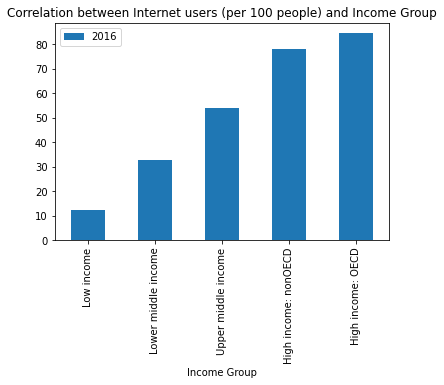

In [76]:
DC_IU_corr_plot.plot(kind='bar')
plt.title("Correlation between Internet users (per 100 people) and Income Group")
plt.savefig('Correlation between Internet users (per 100 people) and Income Group.png')

### Not to be discrimatory I have selected the top income group that have at least  more than 50% internet usage

In [77]:
DC_Work = DC_clean.loc[DC_clean['Income Group'].isin(['Upper middle income','High income: nonOECD','High income: OECD'])]

In [78]:
DC_Work

,Country Code,Country Name,Indicator Name,Indicator Code,Region,Income Group,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8630,ALB,Albania,Duration of compulsory education (years),SE.COM.DURS,Europe & Central Asia,Upper middle income,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0
8631,ALB,Albania,Enrolment in Grade 1 of lower secondary genera...,UIS.E.2.GPV.G1.T,Europe & Central Asia,Upper middle income,71300.0,70948.0,57020.230769,69904.0,...,59366.0,55971.0,54212.0,51001.0,47928.0,47680.0,47411.0,40069.0,57020.230769,57020.230769
8632,ALB,Albania,Enrolment in Grade 1 of lower secondary genera...,UIS.E.2.GPV.G1.F,Europe & Central Asia,Upper middle income,34296.0,34557.0,27386.538462,33604.0,...,28696.0,27063.0,26185.0,24438.0,22773.0,22874.0,22474.0,18600.0,27386.538462,27386.538462
8633,ALB,Albania,"Enrolment in Grade 1 of primary education, bot...",UIS.E.1.G1,Europe & Central Asia,Upper middle income,69829.0,68747.0,50431.5,62530.0,...,50899.0,49336.0,40267.0,42673.0,39932.0,38976.0,38671.0,37151.0,50431.5,50431.5
8634,ALB,Albania,"Enrolment in Grade 1 of primary education, fem...",UIS.E.1.G1.F,Europe & Central Asia,Upper middle income,33454.0,33016.0,23942.571429,29982.0,...,24286.0,23404.0,18573.0,20337.0,18679.0,18352.0,18126.0,17495.0,23942.571429,23942.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98984,VIR,Virgin Islands (U.S.),"Population, total",SP.POP.TOTL,Latin America & Caribbean,High income: nonOECD,108639.0,108386.0,108208.0,108085.0,...,107423.0,107091.0,106707.0,106267.0,105784.0,105275.0,104737.0,104170.0,103574.0,102951.0
98985,VIR,Virgin Islands (U.S.),Theoretical duration of primary education (years),SE.PRM.DURS,Latin America & Caribbean,High income: nonOECD,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
98986,VIR,Virgin Islands (U.S.),"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,Latin America & Caribbean,High income: nonOECD,7.6,9.4,3.4,10.5,...,9.3,9.9,10.7,9.3,10.8,11.9,10.6,9.6,9.4,9.2
98987,VIR,Virgin Islands (U.S.),"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,Latin America & Caribbean,High income: nonOECD,5.8,6.9,3.2,7.5,...,6.7,7.1,7.5,6.8,7.6,8.3,7.6,7.1,7.0,6.9


### after confirming the correlation on the income group and internet usage, the decision is to aim education to be addressed on the unemployed people in those region where most new job requires Digital skill and unemployed task force are the best place to aim. most people that are ready to take new training are people that are unemployed that requires to find a job

### knowming that the data of the unemployed are in %, we do require to convert it into real numbers. knowing as well that the labor force is a population between the age of 15 to 64. the decision is to merge to data based on the country code and then do a simple matimatical operation

In [79]:
Data_1 = DC_Work.loc[DC_Work ["Indicator Code"]=="SL.UEM.TOTL.ZS"]
Data_2 = DC_Work.loc[DC_Work ["Indicator Code"]=="SP.POP.1564.TO"]
Data_2 = Data_2.loc[Data_2['Country Code'].isin(Data_1['Country Code'])]

In [80]:
DC_Work = pd.merge (Data_1, Data_2, on = "Country Code")

In [81]:
DC_Work

,Country Code,Country Name_x,Indicator Name_x,Indicator Code_x,Region_x,Income Group_x,2000_x,2001_x,2002_x,2003_x,...,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,ALB,Albania,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Europe & Central Asia,Upper middle income,14.1,22.700001,14.8,14.0,...,1958838.0,1954566.0,1950306.0,1947666.0,1961611.0,1975480.0,1987352.0,1996460.0,2000257.0,1997271.0
1,DZA,Algeria,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Middle East & North Africa,Upper middle income,29.799999,27.299999,25.9,23.700001,...,22965441.0,23433829.0,23883916.0,24315242.0,24691566.0,25080157.0,25457105.0,25800849.0,26106760.0,26383347.0
2,AGO,Angola,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Sub-Saharan Africa,Upper middle income,6.3,6.3,6.4,6.3,...,10560352.0,10942997.0,11346290.0,11771088.0,12188515.0,12635901.0,13107343.0,13596360.0,14100537.0,14605793.0
3,ARG,Argentina,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Latin America & Caribbean,Upper middle income,15.0,17.4,19.6,16.0,...,25288050.0,25624337.0,25953592.0,26268474.0,26575746.0,26869103.0,27153851.0,27440753.0,27734296.0,28009966.0
4,AUS,Australia,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,East Asia & Pacific,High income: OECD,6.3,6.7,6.4,5.9,...,14076899.0,14373618.0,14668523.0,14879463.0,15029738.0,15233953.0,15435139.0,15598904.0,15745617.0,15887445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,GBR,United Kingdom,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Europe & Central Asia,High income: OECD,5.6,4.7,5.0,4.8,...,40522451.0,40834771.0,41103390.0,41350322.0,41474839.0,41563441.0,41637474.0,41744392.0,41873827.0,42028042.0
102,USA,United States,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,North America,High income: OECD,4.0,4.7,5.8,6.0,...,201423516.0,203478887.0,205278324.0,206816889.0,208094512.0,209318529.0,210354971.0,211378325.0,212262832.0,213071223.0
103,URY,Uruguay,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Latin America & Caribbean,High income: nonOECD,13.3,14.9,17.0,16.4,...,2103815.0,2117206.0,2131156.0,2144437.0,2156178.0,2167788.0,2179148.0,2190338.0,2201356.0,2211820.0
104,VEN,"Venezuela, RB","Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,Latin America & Caribbean,Upper middle income,13.2,12.8,16.200001,16.799999,...,17727023.0,18090057.0,18446608.0,18796235.0,19133607.0,19463631.0,19787207.0,20106367.0,20422290.0,20731567.0


In [82]:
DC_Work.columns

Index(['Country Code', 'Country Name_x', 'Indicator Name_x',
       'Indicator Code_x', 'Region_x', 'Income Group_x', '2000_x', '2001_x',
       '2002_x', '2003_x', '2004_x', '2005_x', '2006_x', '2007_x', '2008_x',
       '2009_x', '2010_x', '2011_x', '2012_x', '2013_x', '2014_x', '2015_x',
       '2016_x', 'Country Name_y', 'Indicator Name_y', 'Indicator Code_y',
       'Region_y', 'Income Group_y', '2000_y', '2001_y', '2002_y', '2003_y',
       '2004_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y', '2010_y',
       '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y'],
      dtype='object')

In [83]:
DC_Work.drop(["Indicator Code_x","Income Group_x","Country Name_y","Indicator Name_y","Indicator Code_y","Income Group_y",'Region_y'], axis=1, inplace=True)
DC_Work

,Country Code,Country Name_x,Indicator Name_x,Region_x,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,...,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y
0,ALB,Albania,"Unemployment, total (% of total labor force)",Europe & Central Asia,14.1,22.700001,14.8,14.0,13.9,13.8,...,1958838.0,1954566.0,1950306.0,1947666.0,1961611.0,1975480.0,1987352.0,1996460.0,2000257.0,1997271.0
1,DZA,Algeria,"Unemployment, total (% of total labor force)",Middle East & North Africa,29.799999,27.299999,25.9,23.700001,17.700001,15.3,...,22965441.0,23433829.0,23883916.0,24315242.0,24691566.0,25080157.0,25457105.0,25800849.0,26106760.0,26383347.0
2,AGO,Angola,"Unemployment, total (% of total labor force)",Sub-Saharan Africa,6.3,6.3,6.4,6.3,6.4,6.5,...,10560352.0,10942997.0,11346290.0,11771088.0,12188515.0,12635901.0,13107343.0,13596360.0,14100537.0,14605793.0
3,ARG,Argentina,"Unemployment, total (% of total labor force)",Latin America & Caribbean,15.0,17.4,19.6,16.0,13.5,11.5,...,25288050.0,25624337.0,25953592.0,26268474.0,26575746.0,26869103.0,27153851.0,27440753.0,27734296.0,28009966.0
4,AUS,Australia,"Unemployment, total (% of total labor force)",East Asia & Pacific,6.3,6.7,6.4,5.9,5.4,5.0,...,14076899.0,14373618.0,14668523.0,14879463.0,15029738.0,15233953.0,15435139.0,15598904.0,15745617.0,15887445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,GBR,United Kingdom,"Unemployment, total (% of total labor force)",Europe & Central Asia,5.6,4.7,5.0,4.8,4.6,4.8,...,40522451.0,40834771.0,41103390.0,41350322.0,41474839.0,41563441.0,41637474.0,41744392.0,41873827.0,42028042.0
102,USA,United States,"Unemployment, total (% of total labor force)",North America,4.0,4.7,5.8,6.0,5.5,5.1,...,201423516.0,203478887.0,205278324.0,206816889.0,208094512.0,209318529.0,210354971.0,211378325.0,212262832.0,213071223.0
103,URY,Uruguay,"Unemployment, total (% of total labor force)",Latin America & Caribbean,13.3,14.9,17.0,16.4,15.2,12.2,...,2103815.0,2117206.0,2131156.0,2144437.0,2156178.0,2167788.0,2179148.0,2190338.0,2201356.0,2211820.0
104,VEN,"Venezuela, RB","Unemployment, total (% of total labor force)",Latin America & Caribbean,13.2,12.8,16.200001,16.799999,15.0,11.4,...,17727023.0,18090057.0,18446608.0,18796235.0,19133607.0,19463631.0,19787207.0,20106367.0,20422290.0,20731567.0


In [84]:
Data_UE = pd.DataFrame(DC_Work['Country Code'])
Data_UE["2010"]=(DC_Work['2010_x']*DC_Work['2010_y'])/100
Data_UE["2011"]=(DC_Work['2011_x']*DC_Work['2011_y'])/100
Data_UE["2012"]=(DC_Work['2012_x']*DC_Work['2012_y'])/100
Data_UE["2013"]=(DC_Work['2013_x']*DC_Work['2013_y'])/100
Data_UE["2014"]=(DC_Work['2014_x']*DC_Work['2014_y'])/100
Data_UE["2015"]=(DC_Work['2015_x']*DC_Work['2015_y'])/100
Data_UE["2016"]=(DC_Work['2016_x']*DC_Work['2016_y'])/100

### we created a new range for years 
### map select each each value in the list to convert it in to the select type in the () and we selected "string"

### we created a new variable called "year" to iterate ( to go one by one) from the list we selected "yearS"

In [85]:
years = list(range(2010, 2017))
years = list(map(str, years))

for year in years:
    Data_UE[year] = Data_UE[year].astype(float)

### created a new colmun called Average in case we do need it

In [86]:
Data_UE['Average'] = Data_UE.mean(axis=1)

In [87]:
Data_UE

,Country Code,2010,2011,2012,2013,2014,2015,2016,Average
0,ALB,2.765686e+05,2.746255e+05,2.647143e+05,3.100269e+05,3.493805e+05,3.420440e+05,3.035852e+05,3.029921e+05
1,DZA,2.431524e+06,2.469157e+06,2.758817e+06,2.494796e+06,2.734890e+06,2.923957e+06,3.034085e+06,2.692461e+06
2,AGO,7.298074e+05,7.556879e+05,7.834258e+05,8.126552e+05,8.429743e+05,8.742333e+05,8.909534e+05,8.128196e+05
3,ARG,2.022672e+06,1.913454e+06,1.934575e+06,1.927923e+06,2.003175e+06,1.996869e+06,2.464877e+06,2.037649e+06
4,AUS,7.737320e+05,7.665166e+05,7.921655e+05,8.798029e+05,9.515331e+05,9.604826e+05,9.055843e+05,8.614025e+05
...,...,...,...,...,...,...,...,...,...
101,GBR,3.225325e+06,3.317987e+06,3.283512e+06,3.122811e+06,2.546408e+06,2.219313e+06,2.017346e+06,2.818957e+06
102,USA,1.985442e+07,1.852041e+07,1.695480e+07,1.556627e+07,1.310546e+07,1.124993e+07,1.044049e+07,1.509883e+07
103,URY,1.458217e+05,1.358392e+05,1.387384e+05,1.394655e+05,1.423720e+05,1.651017e+05,1.725220e+05,1.485515e+05
104,VEN,1.578884e+06,1.492421e+06,1.440309e+06,1.543402e+06,1.407446e+06,1.388716e+06,1.492673e+06,1.477693e+06


In [88]:
Data_UE.sort_values(by='2016', ascending=False, inplace=True)
Data_UE

,Country Code,2010,2011,2012,2013,2014,2015,2016,Average
21,CHN,4.143627e+07,4.260029e+07,4.471055e+07,4.478644e+07,4.581814e+07,4.482137e+07,4.577335e+07,4.427806e+07
15,BRA,1.143569e+07,1.063890e+07,1.022714e+07,9.936825e+06,9.630714e+06,1.217234e+07,1.662445e+07,1.152372e+07
102,USA,1.985442e+07,1.852041e+07,1.695480e+07,1.556627e+07,1.310546e+07,1.124993e+07,1.044049e+07,1.509883e+07
87,ZAF,8.170431e+06,8.276912e+06,8.454764e+06,8.567778e+06,8.825134e+06,9.090464e+06,9.794506e+06,8.739998e+06
44,IRN,7.208717e+06,6.658049e+06,6.689311e+06,5.770213e+06,5.944026e+06,6.283758e+06,6.507840e+06,6.437416e+06
...,...,...,...,...,...,...,...,...,...
43,ISL,1.624234e+04,1.496089e+04,1.285272e+04,1.163684e+04,1.063393e+04,8.729920e+03,6.593850e+03,1.166436e+04
40,GUM,8.528902e+03,1.389012e+04,1.278560e+04,1.209248e+04,8.026436e+03,7.329111e+03,5.777460e+03,9.775730e+03
105,VIR,5.519177e+03,6.262893e+03,6.707943e+03,5.998770e+03,5.373624e+03,5.217291e+03,5.083280e+03,5.737568e+03
79,QAT,6.112952e+03,1.003477e+04,7.224472e+03,5.771094e+03,4.049202e+03,4.222780e+03,4.365068e+03,5.968619e+03


### has we see here china is on top basing on the 3 variables that are inthe top 3 regions that has high income , and has above 50% internet usage and we see the big potential clients from the unemplement, but it seems somehting is still not clear

### I have decided to have another look on other charts to see if there's something that could tell me and will compare them to the 3 other higer unemplement countries

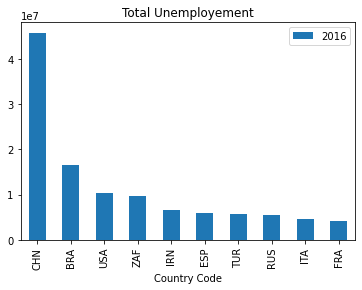

In [89]:
Data_UE.head(10).plot(kind='bar',x='Country Code',y=['2016'])
plt.title('Total Unemployement')
plt.show()
plt.savefig('Total Unemployement.png')

In [90]:
Top_10 = Data_UE.head(10)

In [91]:
Top_10.set_index('Country Code', inplace=True)
Top_10.head()

,2010,2011,2012,2013,2014,2015,2016,Average
Country Code,,,,,,,,
CHN,4.143627e+07,4.260029e+07,4.471055e+07,4.478644e+07,4.581814e+07,4.482137e+07,4.577335e+07,4.427806e+07
BRA,1.143569e+07,1.063890e+07,1.022714e+07,9.936825e+06,9.630714e+06,1.217234e+07,1.662445e+07,1.152372e+07
USA,1.985442e+07,1.852041e+07,1.695480e+07,1.556627e+07,1.310546e+07,1.124993e+07,1.044049e+07,1.509883e+07
ZAF,8.170431e+06,8.276912e+06,8.454764e+06,8.567778e+06,8.825134e+06,9.090464e+06,9.794506e+06,8.739998e+06
IRN,7.208717e+06,6.658049e+06,6.689311e+06,5.770213e+06,5.944026e+06,6.283758e+06,6.507840e+06,6.437416e+06


In [92]:
Top_10.sort_values(['2016'], ascending=False, axis=0, inplace=True)
Top_10 = Top_10[years].transpose() 
Top_10.head()

<ipython-input-92-488c346f384d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_10.sort_values(['2016'], ascending=False, axis=0, inplace=True)


Country Code,CHN,BRA,USA,ZAF,IRN,ESP,TUR,RUS,ITA,FRA
2010,4.143627e+07,1.143569e+07,1.985442e+07,8.170431e+06,7.208717e+06,6.319817e+06,5.098937e+06,7.510512e+06,3.261000e+06,3.917195e+06
2011,4.260029e+07,1.063890e+07,1.852041e+07,8.276912e+06,6.658049e+06,6.777844e+06,4.267090e+06,6.671237e+06,3.252118e+06,3.875770e+06
2012,4.471055e+07,1.022714e+07,1.695480e+07,8.454764e+06,6.689311e+06,7.812383e+06,3.999305e+06,5.621286e+06,4.133485e+06,4.123447e+06
2013,4.478644e+07,9.936825e+06,1.556627e+07,8.567778e+06,5.770213e+06,8.147236e+06,4.375200e+06,5.590442e+06,4.704248e+06,4.367884e+06
2014,4.581814e+07,9.630714e+06,1.310546e+07,8.825134e+06,5.944026e+06,7.550974e+06,5.070382e+06,5.253835e+06,4.957529e+06,4.317549e+06


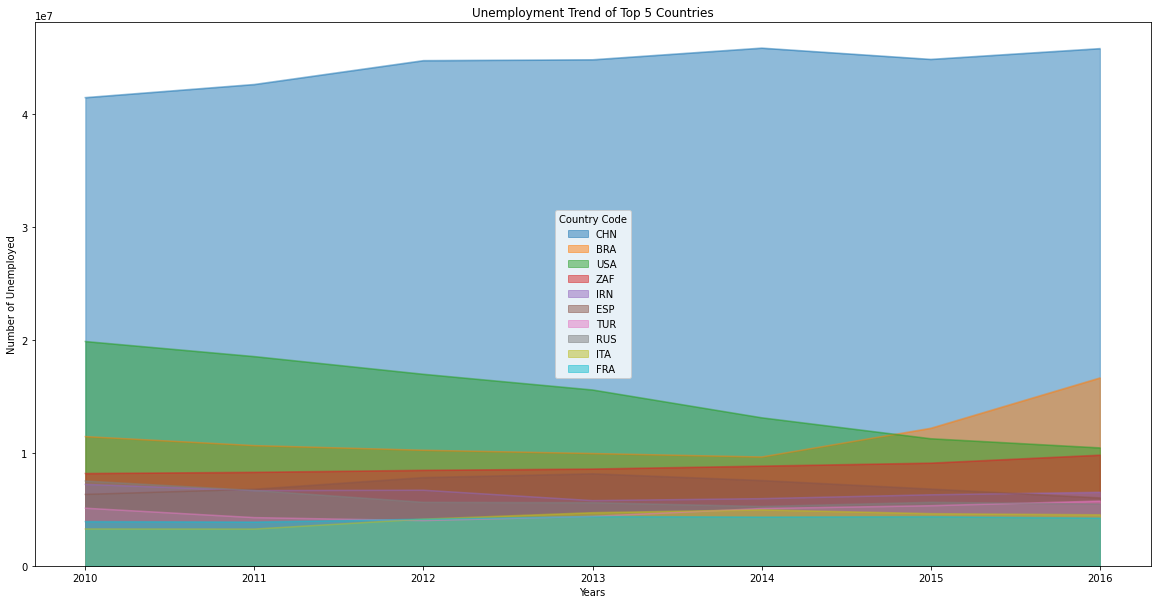

In [93]:
Top_10.index = Top_10.index.map(int) # let's change the index values of df_top5 to type integer for plotting
Top_10.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Unemployment Trend of Top 5 Countries')
plt.ylabel('Number of Unemployed')
plt.xlabel('Years')

plt.show()
plt.savefig('Unemployment Trend of Top 5 Countries Reg.png')

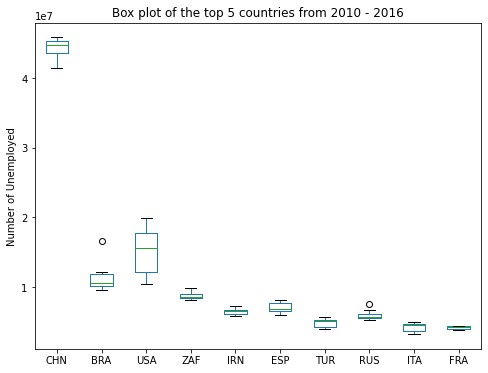

In [94]:
Top_10.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of the top 5 countries from 2010 - 2016')
plt.ylabel('Number of Unemployed')

plt.show()
plt.savefig('Box plot Reg.png')

In [95]:
# we took the non transpose data for the seconde graph

In [96]:
Data_temp = Data_UE.head(10)
Data_temp

,Country Code,2010,2011,2012,2013,2014,2015,2016,Average
21,CHN,4.143627e+07,4.260029e+07,4.471055e+07,4.478644e+07,4.581814e+07,4.482137e+07,4.577335e+07,4.427806e+07
15,BRA,1.143569e+07,1.063890e+07,1.022714e+07,9.936825e+06,9.630714e+06,1.217234e+07,1.662445e+07,1.152372e+07
102,USA,1.985442e+07,1.852041e+07,1.695480e+07,1.556627e+07,1.310546e+07,1.124993e+07,1.044049e+07,1.509883e+07
87,ZAF,8.170431e+06,8.276912e+06,8.454764e+06,8.567778e+06,8.825134e+06,9.090464e+06,9.794506e+06,8.739998e+06
44,IRN,7.208717e+06,6.658049e+06,6.689311e+06,5.770213e+06,5.944026e+06,6.283758e+06,6.507840e+06,6.437416e+06
88,ESP,6.319817e+06,6.777844e+06,7.812383e+06,8.147236e+06,7.550974e+06,6.796886e+06,6.013007e+06,7.059735e+06
98,TUR,5.098937e+06,4.267090e+06,3.999305e+06,4.375200e+06,5.070382e+06,5.318319e+06,5.730655e+06,4.837127e+06
81,RUS,7.510512e+06,6.671237e+06,5.621286e+06,5.590442e+06,5.253835e+06,5.622673e+06,5.471238e+06,5.963032e+06
48,ITA,3.261000e+06,3.252118e+06,4.133485e+06,4.704248e+06,4.957529e+06,4.618767e+06,4.515260e+06,4.206058e+06
35,FRA,3.917195e+06,3.875770e+06,4.123447e+06,4.367884e+06,4.317549e+06,4.351103e+06,4.221434e+06,4.167769e+06


In [116]:
#China

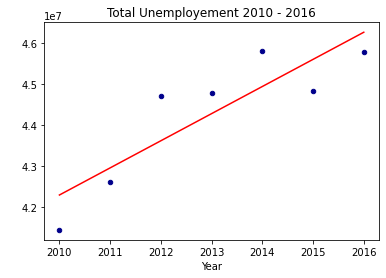

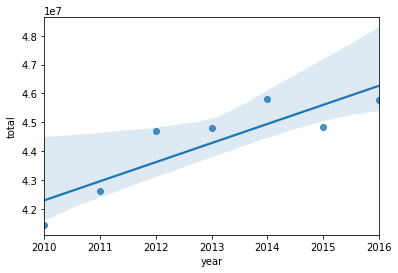

In [123]:
df_tot = pd.DataFrame(Data_temp.loc[Data_temp['Country Code']=='CHN'][years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot

x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

df_tot.plot(kind='scatter', x='year', y='total', color='darkblue')

plt.title('Total Unemployement 2010 - 2016')
plt.xlabel('Year')
plt.ylabel(' ')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()
plt.savefig('China Unemployement.png')
sns.regplot(x="year", y="total", data=df_tot)
plt.savefig('China Reg.png')

In [ ]:
#Russia

In [103]:
df_tot = pd.DataFrame(Data_temp.loc[Data_temp['Country Code']=='RUS'][years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot

,year,total
0,2010.0,7.510512e+06
1,2011.0,6.671237e+06
2,2012.0,5.621286e+06
3,2013.0,5.590442e+06
4,2014.0,5.253835e+06
5,2015.0,5.622673e+06
6,2016.0,5.471238e+06


In [104]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([-3.06514313e+05,  6.22976344e+08])

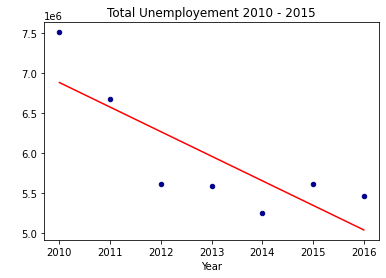

In [105]:
df_tot.plot(kind='scatter', x='year', y='total', color='darkblue')

plt.title('Total Unemployement 2010 - 2016')
plt.xlabel('Year')
plt.ylabel(' ')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()

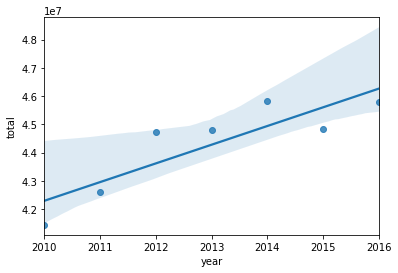

In [124]:
sns.regplot(x="year", y="total", data=df_tot)
plt.savefig('Russia Reg.png')

In [107]:
#Brazil

In [108]:
df_tot = pd.DataFrame(Data_temp.loc[Data_temp['Country Code']=='BRA'][years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot

,year,total
0,2010.0,1.143569e+07
1,2011.0,1.063890e+07
2,2012.0,1.022714e+07
3,2013.0,9.936825e+06
4,2014.0,9.630714e+06
5,2015.0,1.217234e+07
6,2016.0,1.662445e+07


In [109]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 6.44169791e+05, -1.28519007e+09])

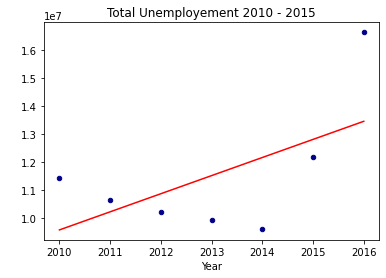

In [110]:
df_tot.plot(kind='scatter', x='year', y='total', color='darkblue')

plt.title('Total Unemployement 2010 - 2016')
plt.xlabel('Year')
plt.ylabel(' ')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()

<AxesSubplot:xlabel='year', ylabel='total'>

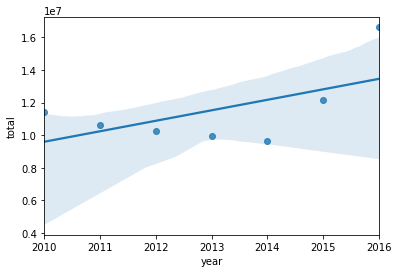

In [111]:
sns.regplot(x="year", y="total", data=df_tot)
plt.savefig('Brazil Reg.png')

In [112]:
#USA

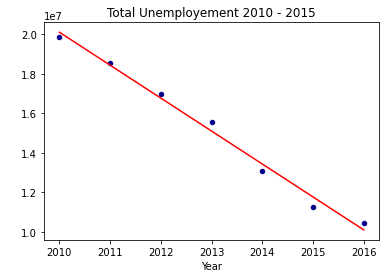

<AxesSubplot:xlabel='year', ylabel='total'>

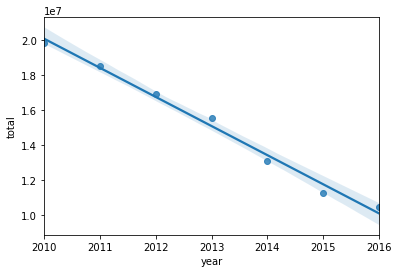

In [113]:
df_tot = pd.DataFrame(Data_temp.loc[Data_temp['Country Code']=='USA'][years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot

x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

df_tot.plot(kind='scatter', x='year', y='total', color='darkblue')

plt.title('Total Unemployement 2010 - 2016')
plt.xlabel('Year')
plt.ylabel(' ')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()

sns.regplot(x="year", y="total", data=df_tot)
plt.savefig('USA Reg.png')

In [114]:
#South Africa

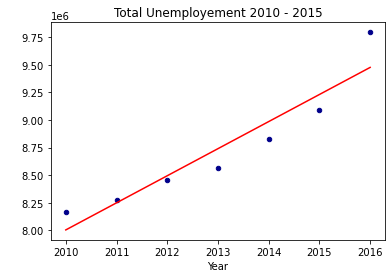

<AxesSubplot:xlabel='year', ylabel='total'>

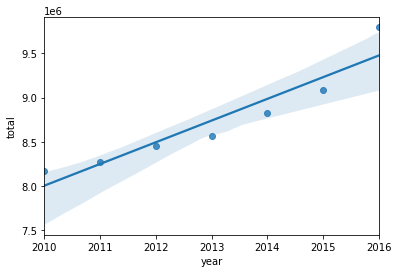

In [115]:
df_tot = pd.DataFrame(Data_temp.loc[Data_temp['Country Code']=='ZAF'][years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot

x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

df_tot.plot(kind='scatter', x='year', y='total', color='darkblue')

plt.title('Total Unemployement 2010 - 2016')
plt.xlabel('Year')
plt.ylabel(' ')
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show()

sns.regplot(x="year", y="total", data=df_tot)
plt.savefig('South Africa Reg.png')

In [101]:
#plt.savefig('books_read.png')